# Data Installation

* i have to implement data installtion logic

# Data Load

In [22]:
import pandas as pd
mnist = pd.read_csv("/Users/yangdongjae/Desktop/2021/ExternalActivities/MachineLearning_Study/Document/3Week(MINIST)/dt/mnist_784.csv")

In [23]:
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Extraction Featrue value, Y value

## iloc function

* [position] = [행 범위, 열범위] 
* [position] = [[특정 행 들], [특정 열 들]]

In [24]:
X = mnist.iloc[:,:784]

In [124]:
y = mnist['class']

# Data visualization

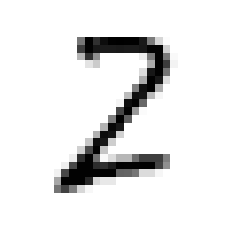

In [125]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(X.iloc[4550])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

# check visualizatio data Y value

In [126]:
y[36000]

9

# Split data set

In [127]:
from sklearn.model_selection import train_test_split
0.33
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size =0.33, random_state = 42 )

In [137]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Extraction class value is 5

In [190]:
df = y_train

In [191]:
is_5 = pd.DataFrame(y_train)['class'] == 5
val = df[is_5]

In [192]:
val

1516     5
4670     5
59329    5
11505    5
63893    5
        ..
55591    5
65697    5
17159    5
66803    5
18431    5
Name: class, Length: 4206, dtype: int64

# Model Training

In [140]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [231]:
sgd_clf.predict([np.array(X.iloc[1516])])

array([ True])

# Implement K- Fold Cross validation Logic

In [206]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = np.array(X_train)[train_index]
    y_train_folds = np.array(y_train_5)[train_index]
    X_test_fold = np.array(X_train)[test_index]
    y_test_fold = np.array(y_train)[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.09901496737878981


/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.09857353035245954
0.09786989061600461


/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [227]:
n_correct

1530

In [230]:
len(y_pred)

15633

In [209]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv = 3 , scoring = "accuracy")

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.85789204, 0.88031728, 0.8627727 ])

In [212]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [213]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train, cv = 3 , scoring = "accuracy")

array([0.09907893, 0.09927717, 0.09818973])

In [222]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [223]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[41625,  1069],
       [ 1552,  2654]])

In [240]:
from sklearn.metrics import precision_score , recall_score

precision_score(y_train_5 , y_train_pred)


0.7128659683051303

In [241]:
recall_score(y_train_5, y_train_pred)

0.6310033285782216

In [242]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.6694412914617228

In [247]:
y_scores = sgd_clf.decision_function([np.array(X.iloc[1516])])
y_scores

array([75635.27667321])

In [253]:
threshold = 0

In [254]:
y_some_digit_pred = (y_scores> threshold)
y_some_digit_pred

array([ True])

In [256]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [257]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3 , method = "decision_function")

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [258]:
y_scores

array([-654593.38617915, -981795.23707758, -991077.12407871, ...,
       -380543.36141571, -683726.2716576 , -964445.12454382])

In [260]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

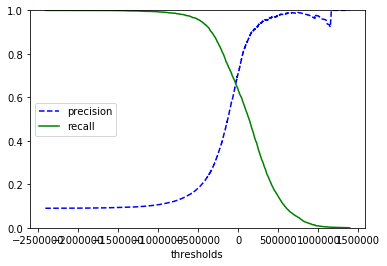

In [264]:
def plot_precision_recacll_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "precision")
    plt.plot(thresholds, recalls[: -1], "g-", label = "recall")
    plt.xlabel("thresholds")
    plt.legend(loc = "center left")
    plt.ylim([0,1])
    
plot_precision_recacll_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [265]:
y_train_pred_90 = (y_scores > 70000)

In [267]:
precision_score(y_train_5 , y_train_pred_90)

0.8202479338842975

In [268]:
recall_score(y_train_5, y_train_pred_90)

0.5663338088445078

In [271]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_train_5, y_scores)

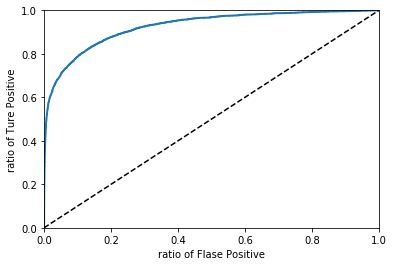

In [277]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2 , label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('ratio of Flase Positive')
    plt.ylabel('ratio of Ture Positive')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [278]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9256418983193742

In [280]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_5, cv = 3 , method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


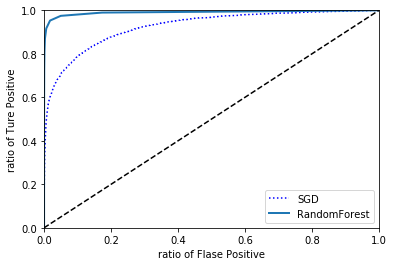

In [284]:
plt.plot(fpr,tpr,"b:",label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest,"RandomForest")
plt.legend(loc = "lower right")
plt.show()

In [286]:
roc_auc_score(y_train_5, y_scores_forest)

0.9907064234505084

# Use Deep Nueral Network (YANG)

---

X_train , X_test , y_train, y_test

In [4]:
import tensorflow as tf
tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128, padding = "same", activation = "relu")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
tf.keras.layers.MaxPooling2D(pool_size = (2,2))

In [9]:
tf.keras.layers.Flatten()

In [10]:
tf.keras.layers.Dropout(rate = 0.5)

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 각종 파라메터의 영향을 보기 위해 랜덤값 고정
tf.random.set_random_seed(1)

# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

# (60000, 28, 28) => (60000, 28, 28, 1)로 reshape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             

In [25]:
model.predict([np.array(X.iloc[1516])])

ValueError: Error when checking input: expected conv2d_13_input to have 4 dimensions, but got array with shape (784, 1)